In [1]:
#from train_retinanet import plot_history
import pandas as pd
import keras_retinanet
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras_retinanet import models, losses
from keras_retinanet.models.retinanet import retinanet_bbox
from keras_retinanet.utils.model import freeze as freeze_model
from keras_retinanet.utils.config import read_config_file, parse_anchor_parameters, parse_pyramid_levels
from keras_retinanet.callbacks.eval import Evaluate
from keras_retinanet.callbacks import RedirectModel
import tensorflow as tf
from tensorflow.keras.optimizers.legacy import SGD

In [10]:
epochs = 49

## ResNet-50 with Data Augmentation

In [7]:
df_resnet50_2 = pd.read_csv(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\retinanet_resnet50_aug_log.csv')

In [ ]:
def plot_history(df_resnet50_2, fig, subtitle, epochs):
    epoch_list = df_resnet50_2['epoch']
    regression_loss = df_resnet50_2['loss']
    classification_loss = df_resnet50_2['classification_loss']
    val_regression_loss = df_resnet50_2['val_regression_loss']
    val_classification_loss = df_resnet50_2['val_classification_loss']
    loss = df_resnet50_2['loss']
    val_loss = df_resnet50_2['val_loss']
    val_mAP = df_resnet50_2['mAP']
    f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(13, 20))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

   
    ax1.plot(epoch_list, classification_loss, label='Train Classification Loss')
    ax1.plot(epoch_list, val_classification_loss, label='Validation Classification Loss')
    ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_ylim(0, 1.3)
    ax1.set_ylabel('Focal Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Classification Loss')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, regression_loss, label='Train Regression Loss')
    ax2.plot(epoch_list, val_regression_loss, label='Validation Regression Loss')
    ax2.set_xticks(np.arange(1, epochs + 1, 1))
    ax2.set_ylim(0, 3)
    ax2.set_ylabel('Smooth L1 Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Regression Loss')
    l2 = ax2.legend(loc="best")

    ax3.plot(epoch_list, loss, label='Train Loss')
    ax3.plot(epoch_list, val_loss, label='Validation Loss')
    ax3.set_xticks(np.arange(1, epochs + 1, 1))
    ax3.set_ylim(0, 4)
    ax3.set_ylabel('Loss')
    ax3.set_xlabel('Epoch')
    ax3.set_title('Total Loss (Classification Loss + Regression Loss)')
    l3 = ax3.legend(loc="best")
    
    ax4.plot(epoch_list, val_mAP, label='Validation AP')
    ax4.set_xticks(np.arange(1, epochs+1, 1))
    ax4.set_ylim(0,1)
    ax4.set_ylabel('AP')
    ax4.set_xlabel('Epoch')
    ax4.set_title('Average Precision (AP)')
    l4 = ax4.legend(loc="best")
    
    plt.savefig(fig, dpi=600)

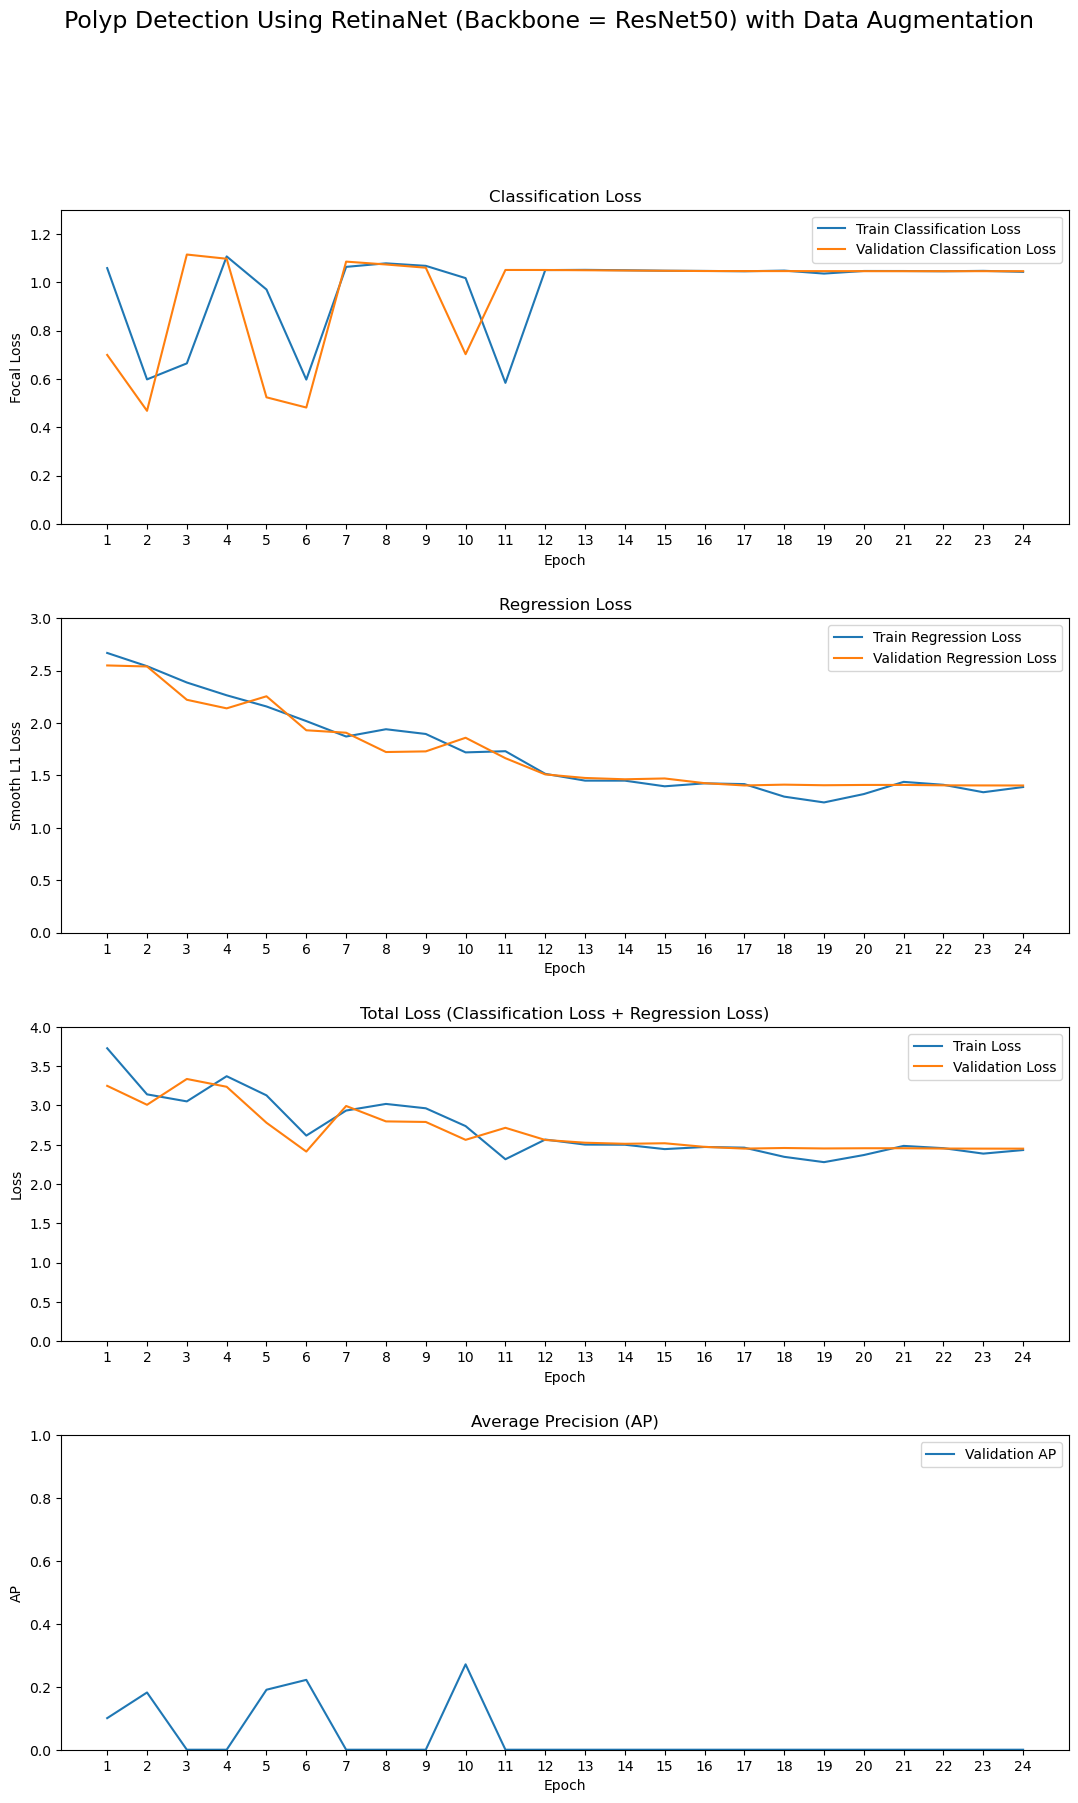

In [8]:
fig = r'C:\Users\Asus\Desktop\retinanet_resnet50_aug1.png'
title = 'Polyp Detection Using RetinaNet (Backbone = ResNet50) with Data Augmentation'
plot_history(df_resnet50_2, fig, title, epochs)

## ResNet-101 with Data Augmentation

In [4]:

def plot_history(df_resnet101_2, fig, subtitle, epochs):
    epoch_list = df_resnet101_2['epoch']
    regression_loss = df_resnet101_2['loss']
    classification_loss = df_resnet101_2['classification_loss']
    val_regression_loss = df_resnet101_2['val_regression_loss']
    val_classification_loss = df_resnet101_2['val_classification_loss']
    loss = df_resnet101_2['loss']
    val_loss = df_resnet101_2['val_loss']
    val_mAP = df_resnet101_2['mAP']
    f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(13, 20))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

   
    ax1.plot(epoch_list, classification_loss, label='Train Classification Loss')
    ax1.plot(epoch_list, val_classification_loss, label='Validation Classification Loss')
    ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_ylim(0, 1.3)
    ax1.set_ylabel('Focal Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Classification Loss')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, regression_loss, label='Train Regression Loss')
    ax2.plot(epoch_list, val_regression_loss, label='Validation Regression Loss')
    ax2.set_xticks(np.arange(1, epochs + 1, 1))
    ax2.set_ylim(0, 3)
    ax2.set_ylabel('Smooth L1 Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Regression Loss')
    l2 = ax2.legend(loc="best")

    ax3.plot(epoch_list, loss, label='Train Loss')
    ax3.plot(epoch_list, val_loss, label='Validation Loss')
    ax3.set_xticks(np.arange(1, epochs + 1, 1))
    ax3.set_ylim(0, 4)
    ax3.set_ylabel('Loss')
    ax3.set_xlabel('Epoch')
    ax3.set_title('Total Loss (Classification Loss + Regression Loss)')
    l3 = ax3.legend(loc="best")
    
    ax4.plot(epoch_list, val_mAP, label='Validation AP')
    ax4.set_xticks(np.arange(1, epochs+1, 1))
    ax4.set_ylim(0,1)
    ax4.set_ylabel('AP')
    ax4.set_xlabel('Epoch')
    ax4.set_title('Average Precision (AP)')
    l4 = ax4.legend(loc="best")
    
    plt.savefig(fig, dpi=600)

In [5]:
df_resnet101_2 = pd.read_csv(r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\retinanet_resnet101_aug_log.csv')

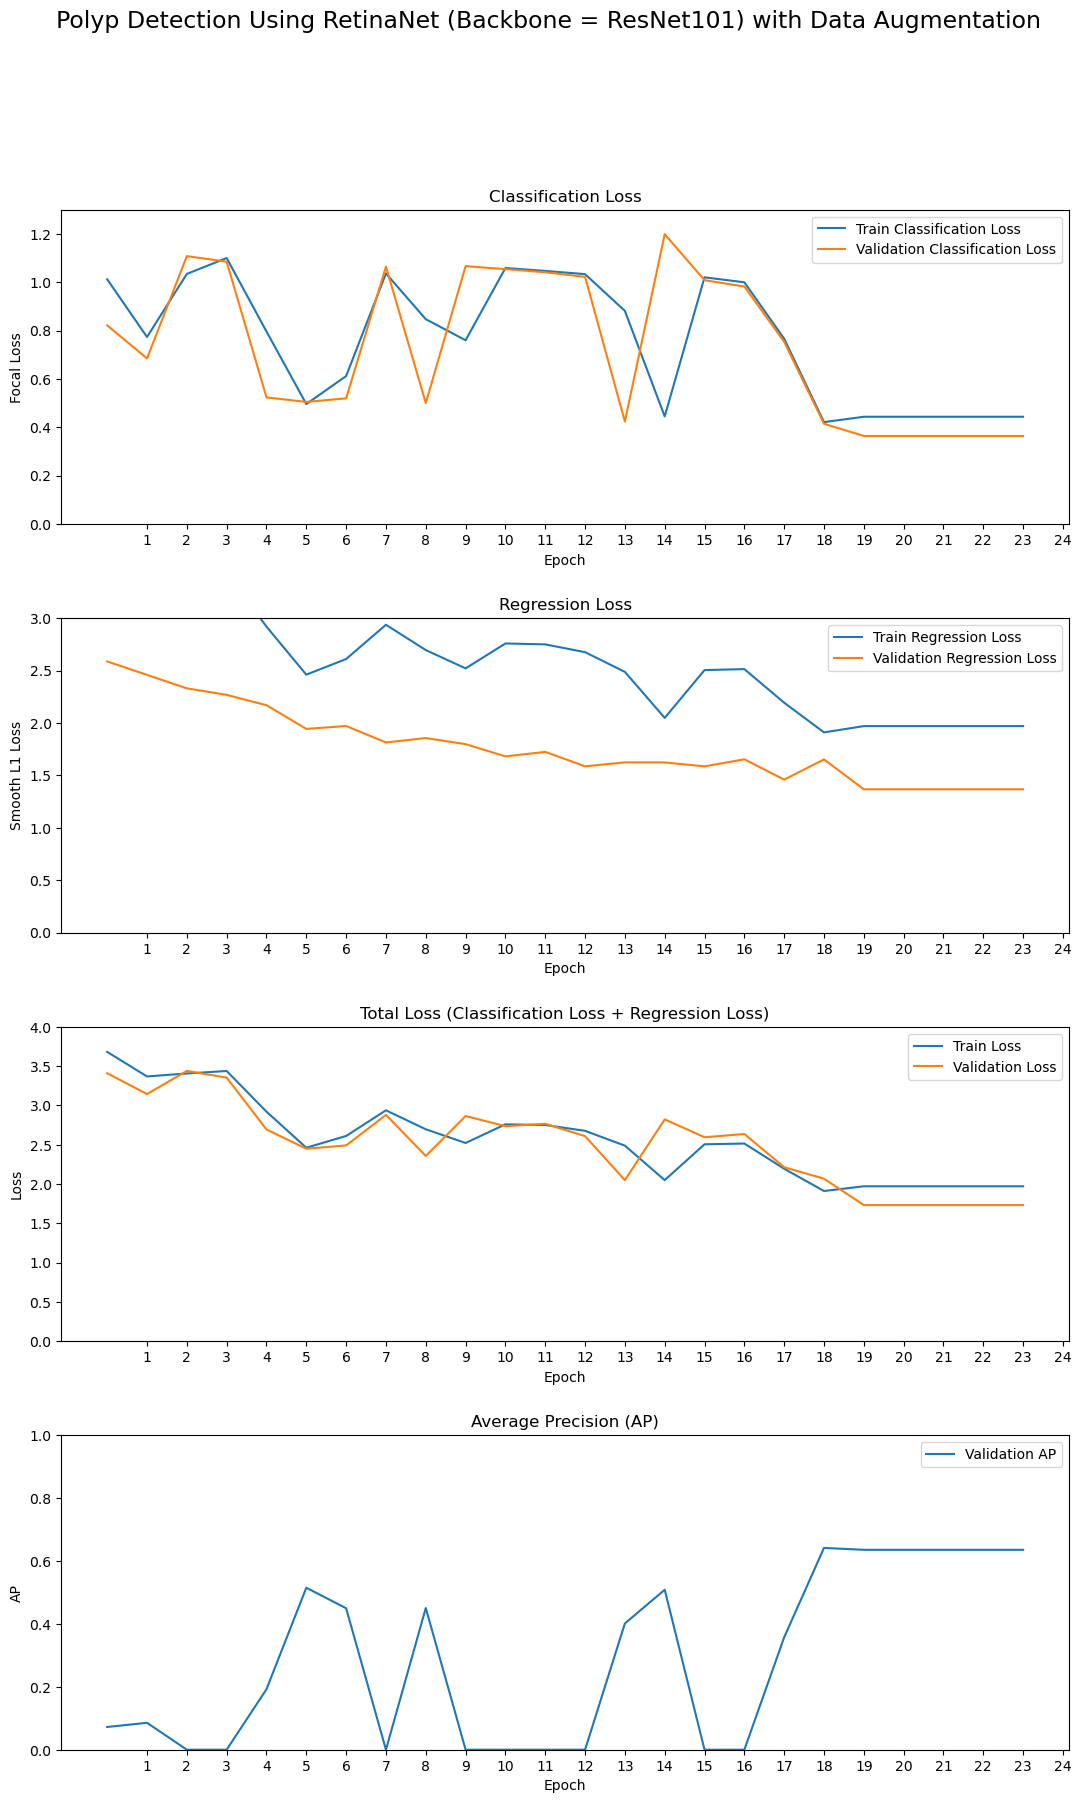

In [8]:
fig = r'C:\Users\Asus\Desktop\ttretinanet_resnet101_aug.png'
title = 'Polyp Detection Using RetinaNet (Backbone = ResNet101) with Data Augmentation'
plot_history(df_resnet101_2, fig, title, epochs)

## ResNet-152 with Data Augmentation

In [11]:
df_resnet152_2 = pd.read_csv(r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Github code\polyp_detection_retinanet-main\result\retinanet_resnet152_aug_log.csv")

In [12]:
def plot_history(df_resnet152_2, fig, subtitle, epochs):
    epoch_list = df_resnet152_2['epoch']
    regression_loss = df_resnet152_2['loss']
    classification_loss = df_resnet152_2['classification_loss']
    val_regression_loss = df_resnet152_2['val_regression_loss']
    val_classification_loss = df_resnet152_2['val_classification_loss']
    loss = df_resnet152_2['loss']
    val_loss = df_resnet152_2['val_loss']
    val_mAP = df_resnet152_2['mAP']
    f, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(13, 20))
    f.subplots_adjust(hspace=0.3)
    t = f.suptitle(subtitle, fontsize=17)

   
    ax1.plot(epoch_list, classification_loss, label='Train Classification Loss')
    ax1.plot(epoch_list, val_classification_loss, label='Validation Classification Loss')
    ax1.set_xticks(np.arange(1, epochs + 1, 1))
    ax1.set_ylim(0, 1.3)
    ax1.set_ylabel('Focal Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_title('Classification Loss')
    l1 = ax1.legend(loc="best")

    ax2.plot(epoch_list, regression_loss, label='Train Regression Loss')
    ax2.plot(epoch_list, val_regression_loss, label='Validation Regression Loss')
    ax2.set_xticks(np.arange(1, epochs + 1, 1))
    ax2.set_ylim(0, 3)
    ax2.set_ylabel('Smooth L1 Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_title('Regression Loss')
    l2 = ax2.legend(loc="best")

    ax3.plot(epoch_list, loss, label='Train Loss')
    ax3.plot(epoch_list, val_loss, label='Validation Loss')
    ax3.set_xticks(np.arange(1, epochs + 1, 1))
    ax3.set_ylim(0, 4)
    ax3.set_ylabel('Loss')
    ax3.set_xlabel('Epoch')
    ax3.set_title('Total Loss (Classification Loss + Regression Loss)')
    l3 = ax3.legend(loc="best")
    
    ax4.plot(epoch_list, val_mAP, label='Validation AP')
    ax4.set_xticks(np.arange(1, epochs+1, 1))
    ax4.set_ylim(0,1)
    ax4.set_ylabel('AP')
    ax4.set_xlabel('Epoch')
    ax4.set_title('Average Precision (AP)')
    l4 = ax4.legend(loc="best")
    
    plt.savefig(fig, dpi=600)

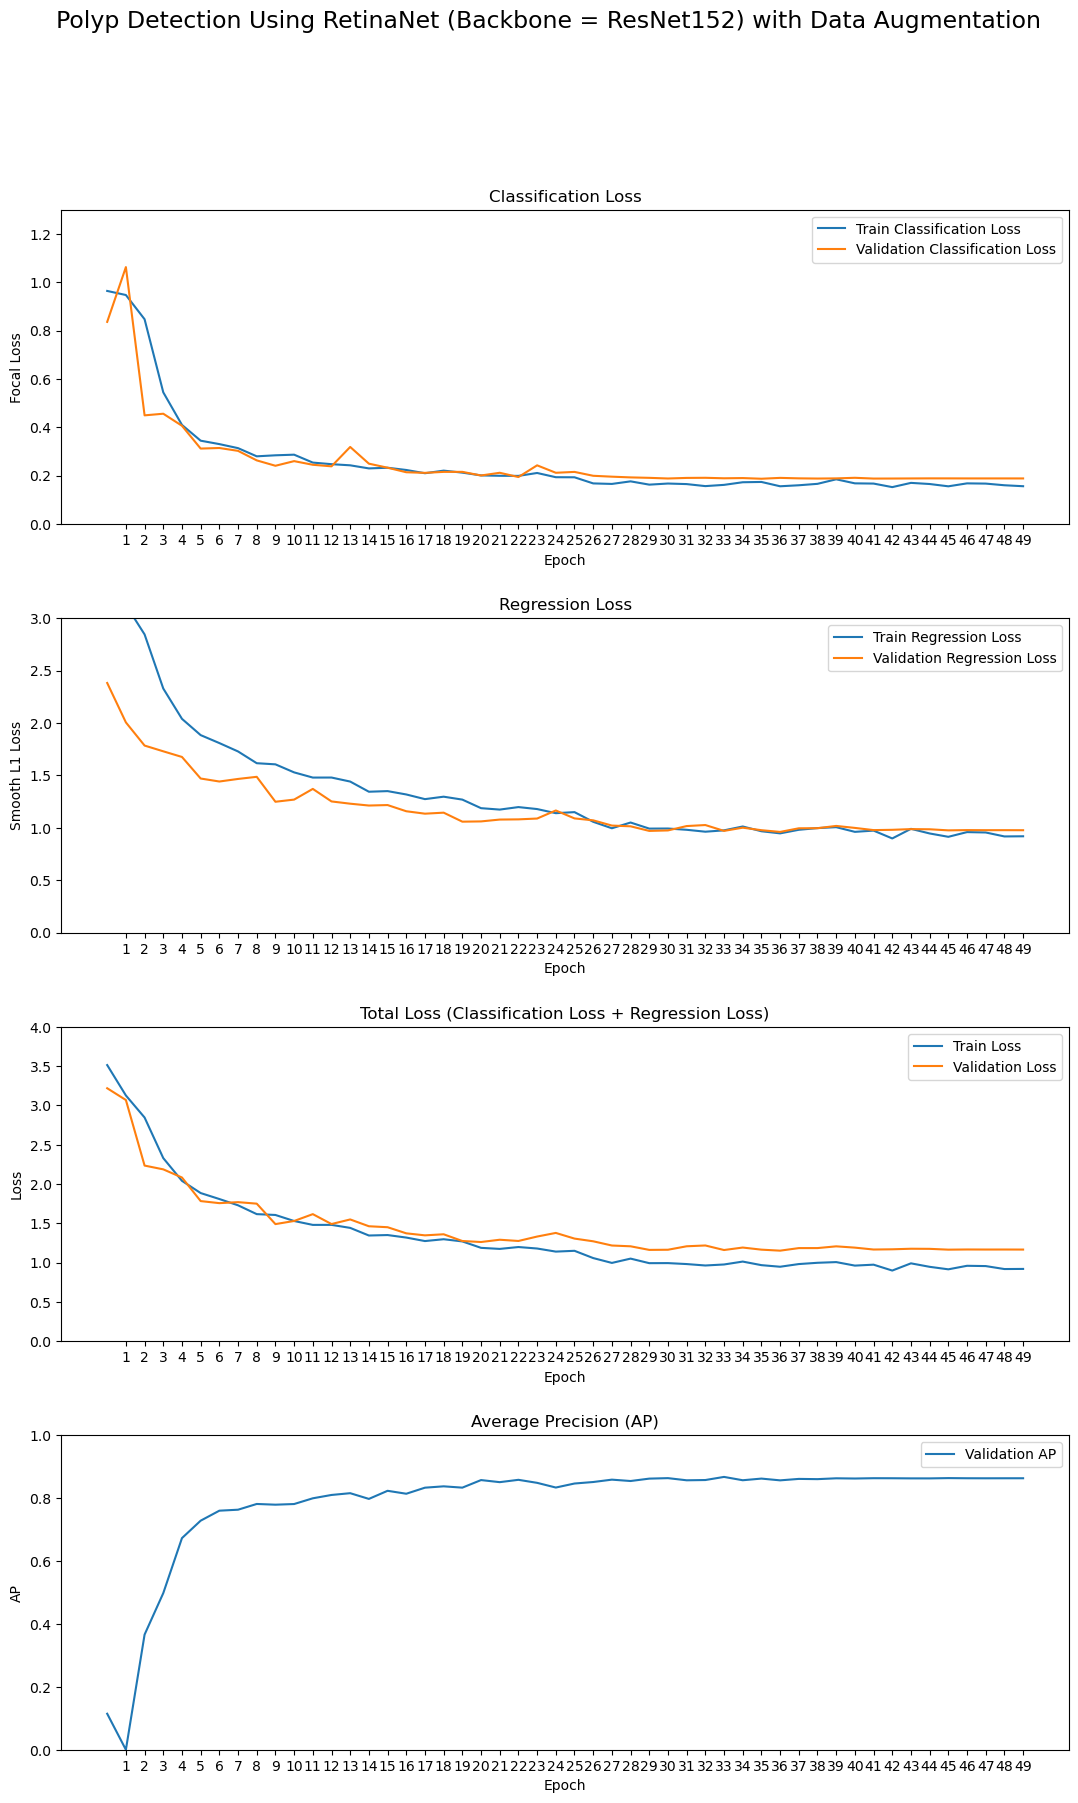

In [13]:
fig = r'C:\Users\Asus\Desktop\ttretinanet_resnet152_aug.png'
title = 'Polyp Detection Using RetinaNet (Backbone = ResNet152) with Data Augmentation'
plot_history(df_resnet152_2, fig, title, epochs)